In [2]:
import xlwings as xw
import pandas as pd

In [3]:
def KBpriceindex_preprocessing(path, data_type):
    wb = xw.Book(path)
    sheet = wb.sheets[data_type]
    row_num = sheet.range('A1','A1').end('down').end('down').end('down').row
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])
    for index, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[index] = big_col[index]
        check = index
        while True:
            if big_col[check] in bigname_list:
                big_col[index] = big_col[check]
                break
            else:
                check = check - 1
    big_col[129] = '경기'
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])
    new_col_data
    index_list = list(new_col_data['구분']['구분'])
    new_index = []
    for index, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        last = ''
        if int(temp[0]) > 12:
            if len(temp[0]) == 2:
                last = '19' + temp[0] + '.' + temp[1]
                new_index.append(last)
            else:
                last = temp[0] + '.' + temp[1]
                new_index.append(last)
        else:
            last = new_index[index - 1].split('.')[0] + '.' + temp[0]
            new_index.append(last)
    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data
                

In [4]:
path = r'/Users/gamgoon/Development/ML/realty/★(월간)KB주택가격동향_시계열(2019.05)21667280850300244.xls'

In [5]:
price_index = KBpriceindex_preprocessing(path, '매매apt')
jeonse_index = KBpriceindex_preprocessing(path, '전세apt')

In [6]:
price_index

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  20.9731  17.1529   24.274     None     None     None     None   
1986-02-01  20.9731  17.1827  24.2342     None     None     None     None   
1986-03-01  20.9345  17.1529  24.1944     None     None     None     None   
1986-04-01  20.8186   17.034  24.0352     None     None     None     None   
1986-05-01  20.6641  16.9448  23.7169     None     None     None     None   
1986-06-01  20.5483  16.7665  23.7169     None     None     None     None   
1986-07-01  20.4324   16.707  23.7169     None     None     None     None   
1986-08-01  20.3938   16.707  23.7169     None     None     None     None   
1986-09-01  20.4324  16.7367  23.7965     None     None     None     None   
1986-10-01  20.4324  16.6773  23.7567     None     None     None     None   
1986-11-01  20.2393  16.4989  23.7965     None     None     None     None   
1986-12-01  20.0848  16.2908  23.7567     None     None     None     None   
1987-01-01  20.0462  16.2908  23.6771     None     None     None     None   
1987-02-01  19.9689  16.2314  23.5577     None     None     None     None   
1987-03-01  19.9689  16.1422   22.921     None     None     None     None   
1987-04-01  19.9689  16.0233  22.6027     None     None     None     None   
1987-05-01  20.0075  16.0233  22.6027     None     None     None     None   
1987-06-01  20.0075  15.9638  22.2445     None     None     None     None   
1987-07-01  20.0848  15.9638  22.2047     None     None     None     None   
1987-08-01  20.2007  16.1125  22.1252     None     None     None     None   
1987-09-01  21.0504  16.5881  22.6027     None     None     None     None   
1987-10-01  21.5525  16.8259  23.1996     None     None     None     None   
1987-11-01  21.9001   17.034  23.2792     None     None     None     None   
1987-12-01  21.9774  17.0638  23.6771     None     None     None     None   
1988-01-01  22.4409  17.3908  23.8761     None     None     None     None   
1988-02-01  23.1747  18.0448  25.1097     None     None     None     None   
1988-03-01    23.87   18.461   25.428     None     None     None     None   
1988-04-01  24.3721  18.8474  25.9055     None     None     None     None   
1988-05-01  24.8742  19.0555  26.3831     None     None     None     None   
1988-06-01  25.1446  19.1447  26.4229     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2016-12-01  95.8431  83.6564   84.681  86.9323  83.0042  85.0075  84.2513   
2017-01-01  95.8625  83.6799  84.7621   87.062  83.0318   85.184  84.3273   
2017-02-01  95.8663   83.712  84.8192  87.1227  82.9924  85.3111  84.3815   
2017-03-01  95.8833  83.7957  84.8876  87.1542   83.007  85.4563  84.4216   
2017-04-01  95.9159   83.911   84.988  87.2256  83.0513  85.5837  84.5425   
2017-05-01  95.9624  84.0954  85.1157  87.3018  83.2426  85.7195  84.6513   
2017-06-01  96.1766  84.8129  85.7676  87.6023  84.4789  86.6308  85.1853   
2017-07-01   96.427  85.5413  86.5229  87.8696   84.983   87.928  86.1326   
2017-08-01  96.7024    86.44   87.389  88.6433  86.0924  89.0067  87.3505   
2017-09-01  96.7567  86.5691  87.5596  88.9465  86.5273  88.9425  87.4265   
2017-10-01  96.8537  86.9553  87.9047  89.1701  87.2415  89.1132  87.7004   
2017-11-01    96.98  87.4942  88.3703  89.5528  88.4544  89.3219  88.0527   
2017-12-01  97.0968  88.0725   88.777  89.7843  89.3358  89.4983  88.4095   
2018-01-01  97.2988  89.0618   89.381  89.9225  90.7394  89.6321  88.8207   
2018-02-01  97.4972  89.9397   89.997  90.2517  92.1078  90.0334  89.0844   
2018-03-01  97.7636  91.0677  91.0304  90.6799  93.8976   90.724   89.578   
2018-04-01  97.8966  91.8071  91.6836  91.0572  94.5549  91.1696  90.1543   
2018-05-01   97.948  92.1726  92.0463  91.2819  94.7166  91.3508  90.9359   
2018-06-01  98.0026  92.5314  92.3843  91.7417  94.7193  91.4554  91.1742   
2018-07-01  9

In [7]:
jeonse_index

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  10.7932  9.78174  10.7305     None     None     None     None   
1986-02-01  11.1043  10.1955  10.8564     None     None     None     None   
1986-03-01  11.4464  10.5501  11.1396     None     None     None     None   
1986-04-01  11.6952  10.7865  11.3284     None     None     None     None   
1986-05-01  11.7263  10.8752  11.5172     None     None     None     None   
1986-06-01  11.6641  10.7865  11.5172     None     None     None     None   
1986-07-01   11.633  10.7865  11.6116     None     None     None     None   
1986-08-01  11.7263  10.8752  11.6116     None     None     None     None   
1986-09-01  12.0374  11.3184  11.7375     None     None     None     None   
1986-10-01  12.1307   11.348  11.8948     None     None     None     None   
1986-11-01  11.8508  10.8752  11.8004     None     None     None     None   
1986-12-01  11.6019  10.5205   11.706     None     None     None     None   
1987-01-01   11.633  10.6979  11.6116     None     None     None     None   
1987-02-01  11.9441   11.082  11.6745     None     None     None     None   
1987-03-01  12.3484  11.4958  12.1151     None     None     None     None   
1987-04-01  12.7217  11.8504  12.3668     None     None     None     None   
1987-05-01  12.8461  11.9095  12.3983     None     None     None     None   
1987-06-01  12.9083  11.9981  12.5871     None     None     None     None   
1987-07-01  12.9705  11.9981  12.5871     None     None     None     None   
1987-08-01  13.0638  12.0868  12.7444     None     None     None     None   
1987-09-01  13.7792  12.6778  13.0591     None     None     None     None   
1987-10-01  13.9659   12.796  13.5941     None     None     None     None   
1987-11-01  14.2769   13.062  13.9402     None     None     None     None   
1987-12-01  14.2769   13.062  13.9402     None     None     None     None   
1988-01-01  14.4946  13.2984  13.9402     None     None     None     None   
1988-02-01  15.0234  13.8599  14.3808     None     None     None     None   
1988-03-01  15.6455  14.4805  15.0101     None     None     None     None   
1988-04-01   16.081  14.8056   15.136     None     None     None     None   
1988-05-01  16.3298  14.8647  15.7024     None     None     None     None   
1988-06-01  16.3609  14.6874  15.3248     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2016-12-01  100.345  96.4995  96.7262  96.1059    95.34  98.3911  97.6155   
2017-01-01  100.381  96.5566  96.8015  96.2734  95.3933  98.5074  97.6937   
2017-02-01  100.404  96.5834  96.8341  96.4531  95.3336  98.5354  97.6938   
2017-03-01  100.415  96.6243  96.8994  96.4585  95.3336  98.6417  97.7054   
2017-04-01   100.43  96.6971  96.9758  96.4818  95.3319  98.7428  97.7211   
2017-05-01  100.456  96.8044  97.0524  96.5048  95.3467  98.8507  97.8014   
2017-06-01  100.521  97.1108  97.3002  96.5708  96.0179  99.1336  98.0909   
2017-07-01  100.584  97.4544  97.6228  96.6811  96.3286  99.6093    98.51   
2017-08-01  100.636  97.7994  97.8932  97.0458  96.7319  99.9381  98.7816   
2017-09-01  100.644  97.9557  98.0493  97.1899  97.0868  100.033  98.7983   
2017-10-01   100.67  98.1373  98.1799  97.4362  97.3825  99.9966   99.051   
2017-11-01  100.654   98.338  98.3535  97.6107  98.1109  99.9633  99.0558   
2017-12-01  100.631   98.507  98.4142  97.6526  98.4636  99.7444  99.0735   
2018-01-01  100.607  98.6868    98.53  97.7546  98.9907  99.6424  99.1461   
2018-02-01  100.582  98.8057  98.6244  97.8864  99.3394  99.6178  99.1461   
2018-03-01  100.541  98.9218  98.8006  98.0804  99.4446  99.6349  99.1461   
2018-04-01  100.462  98.9139  98.8495  98.2067  99.2704  99.5394  99.1196   
2018-05-01  100.346  98.8449  98.8791  98.3145  99.2117  99.5066  99.1169   
2018-06-01   100.24   98.809  98.8949  98.4889  99.1624  99.4924  99.0599   
2018-07-01  1

In [11]:
# 특정 기준일로부터 1년전 값과 비교해서 증감률을 계산
from datetime import datetime
from dateutil.relativedelta import relativedelta

index_date = datetime(2010, 1, 1)
time_range = 12
prev_date = index_date - relativedelta(months=time_range)

print(index_date)
print(prev_date)

price_index.loc[index_date]

2010-01-01 00:00:00
2009-01-01 00:00:00


전국     전국       78.0872
서울     서울       82.4551
       강북       84.2324
       강북구      88.8722
       광진구      80.5819
       노원구      87.1546
       도봉구      88.7165
       동대문구     81.6938
       마포구       77.684
       서대문구     81.1079
       성동구      78.3887
       성북구      80.7223
       용산구       85.277
       은평구      89.1186
       종로구      87.8859
       중구       85.9237
       중랑구      87.1708
       강남       81.0072
       강남구      78.4616
       강동구      80.2804
       강서구      86.9699
       관악구      82.5666
       구로구      81.4959
       금천구      87.9427
       동작구      77.9876
       서초구      78.9766
       송파구      80.9037
       양천구      83.0239
       영등포구     77.9393
6개광역시  6개광역시    69.2587
                 ...   
전북     익산       79.6403
       군산       91.3627
전남     전남       79.3288
       목포       71.6754
       순천       84.7078
       광양        89.153
       여수       76.6219
경북     경북       74.8232
       포항       83.6825
       남구       82.8257
       북구       

In [12]:
# 증감률 = 현재 날짜 지수 값 - 이전 날짜 지수 값 / 이전 날짜 지수 값
# 지역명마다 매매가 지수 증감률이 값으로 들어가 있는 시리즈인 셈이다
(price_index.loc[index_date] - price_index.loc[prev_date]) / price_index.loc[prev_date]

전국     전국        0.0241779
서울     서울        0.0361481
       강북        0.0158269
       강북구     -0.00327966
       광진구       0.0219288
       노원구       0.0208965
       도봉구      0.00859785
       동대문구      0.0152782
       마포구       0.0533287
       서대문구     0.00679417
       성동구      0.00504173
       성북구      0.00661775
       용산구       0.0224884
       은평구     -0.00382292
       종로구       0.0338162
       중구        0.0318948
       중랑구      0.00311658
       강남        0.0531935
       강남구        0.078219
       강동구        0.106108
       강서구       0.0187891
       관악구      0.00860809
       구로구      0.00383988
       금천구      0.00896509
       동작구       0.0060439
       서초구       0.0802787
       송파구       0.0754676
       양천구       0.0784959
       영등포구      0.0446273
6개광역시  6개광역시     0.0281944
                   ...    
전북     익산        0.0574571
       군산         0.038515
전남     전남        0.0447284
       목포        0.0231574
       순천        0.0202299
       광양        0.0937503
 

In [13]:
# 계산한 가격지수 증감률 데이터를 데이터프레임 형태로 저장
demand_df = pd.DataFrame()
demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date]) / price_index.loc[prev_date]
demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date]) / jeonse_index.loc[prev_date]
demand_df

매매증감률       전세증감률
전국    전국      0.0241779   0.0623334
서울    서울      0.0361481    0.105536
      강북      0.0158269   0.0714128
      강북구   -0.00327966   0.0384684
      광진구     0.0219288    0.147834
      노원구     0.0208965   0.0757956
      도봉구    0.00859785   0.0808634
      동대문구    0.0152782   0.0502244
      마포구     0.0533287    0.114332
      서대문구   0.00679417   0.0356223
      성동구    0.00504173   0.0747886
      성북구    0.00661775   0.0536113
      용산구     0.0224884   0.0518684
      은평구   -0.00382292   0.0626292
      종로구     0.0338162   0.0552677
      중구      0.0318948   0.0834805
      중랑구    0.00311658   0.0471958
      강남      0.0531935    0.134123
      강남구      0.078219    0.125543
      강동구      0.106108    0.164623
      강서구     0.0187891    0.148582
      관악구    0.00860809    0.111073
      구로구    0.00383988    0.057041
      금천구    0.00896509    0.065918
      동작구     0.0060439    0.112669
      서초구     0.0802787    0.195599
      송파구     0.0754676    0.209697
      양천구     0.0784959       0.118
      영등포구    0.0446273   0.0829252
6개광역시 6개광역시   0.0281944    0.047738
...                 ...         ...
전북    익산      0.0574571   0.0757243
      군산       0.038515    0.104057
전남    전남      0.0447284   0.0537103
      목포      0.0231574   0.0236567
      순천      0.0202299   0.0307448
      광양      0.0937503   0.0899423
      여수      0.0623136      0.0848
경북    경북    -0.00168908  0.00614955
      포항       0.030353   0.0527429
      남구       0.012624   0.0281755
      북구      0.0436859   0.0714979
      구미     -0.0374303  -0.0415586
      경산    -0.00514758 -0.00497434
      안동            NaN         NaN
      김천            NaN         NaN
경남    경남      0.0332709   0.0443842
      창원      0.0367256   0.0459384
      마산합포구         NaN         NaN
      마산회원구         NaN         NaN
      성산구           NaN         NaN
      의창구           NaN         NaN
      진해구     0.0220829   0.0305346
      양산      0.0136789   0.0514735
      거제       0.113989    0.114671
      진주    -0.00376502   0.0302995
      김해      0.0218282   0.0133502
      통영            NaN         NaN
제주도   제주도           NaN         NaN
      서귀포     0.0264182    0.030383
기타지방  기타지방    0.0271691   0.0369051

[186 rows x 2 columns]

In [17]:
# 기준 날짜의 매매가 지수와 지난 3년 동안의 최댓값 비교
prev_date2 = index_date - relativedelta(months=time_range*3)
price_index[prev_date2:index_date][:-1]

전국     전국       77.972536
서울     서울       82.595777
       강북       84.973577
       강북구      91.125252
       광진구      83.438662
       노원구      88.262880
       도봉구      90.077121
       동대문구     81.585679
       마포구      77.820245
       서대문구     81.237522
       성동구      79.105387
       성북구      81.757875
       용산구      86.580868
       은평구      90.460256
       종로구      87.763135
       중구       86.143507
       중랑구      87.476175
       강남       80.941221
       강남구      81.358306
       강동구      81.767850
       강서구      87.139348
       관악구      83.208487
       구로구      82.283805
       금천구      88.276590
       동작구      79.907818
       서초구      80.202873
       송파구      85.907143
       양천구      84.631822
       영등포구     77.730225
6개광역시  6개광역시    69.036974
                  ...    
전북     익산       79.263709
       군산       94.547298
전남     전남       78.865757
       목포       71.511515
       순천       84.143193
       광양       87.610493
       여수       76.506255
경북     경북   

In [18]:
demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값']) / demand_df['이전최대값']

In [19]:
demand_df

매매증감률       전세증감률      이전최대값     최댓값대비증감률
전국    전국      0.0241779   0.0623334  77.972536   0.00147006
서울    서울      0.0361481    0.105536  82.595777  -0.00170335
      강북      0.0158269   0.0714128  84.973577  -0.00872232
      강북구   -0.00327966   0.0384684  91.125252   -0.0247245
      광진구     0.0219288    0.147834  83.438662   -0.0342385
      노원구     0.0208965   0.0757956  88.262880    -0.012557
      도봉구    0.00859785   0.0808634  90.077121   -0.0151048
      동대문구    0.0152782   0.0502244  81.585679   0.00132554
      마포구     0.0533287    0.114332  77.820245  -0.00175024
      서대문구   0.00679417   0.0356223  81.237522   -0.0015961
      성동구    0.00504173   0.0747886  79.105387  -0.00906028
      성북구    0.00661775   0.0536113  81.757875   -0.0126659
      용산구     0.0224884   0.0518684  86.580868   -0.0150592
      은평구   -0.00382292   0.0626292  90.460256   -0.0148314
      종로구     0.0338162   0.0552677  87.763135   0.00139849
      중구      0.0318948   0.0834805  86.143507  -0.00255175
      중랑구    0.00311658   0.0471958  87.476175  -0.00349117
      강남      0.0531935    0.134123  80.941221  0.000815026
      강남구      0.078219    0.125543  81.358306    -0.035604
      강동구      0.106108    0.164623  81.767850   -0.0181917
      강서구     0.0187891    0.148582  87.139348  -0.00194476
      관악구    0.00860809    0.111073  83.208487   -0.0077141
      구로구    0.00383988    0.057041  82.283805  -0.00957563
      금천구    0.00896509    0.065918  88.276590  -0.00378206
      동작구     0.0060439    0.112669  79.907818   -0.0240298
      서초구     0.0802787    0.195599  80.202873   -0.0152893
      송파구     0.0754676    0.209697  85.907143   -0.0582422
      양천구     0.0784959       0.118  84.631822    -0.018999
      영등포구    0.0446273   0.0829252  77.730225   0.00269035
6개광역시 6개광역시   0.0281944    0.047738  69.036974   0.00321103
...                 ...         ...        ...          ...
전북    익산      0.0574571   0.0757243  79.263709   0.00475085
      군산       0.038515    0.104057  94.547298    -0.033683
전남    전남      0.0447284   0.0537103  78.865757   0.00587084
      목포      0.0231574   0.0236567  71.511515   0.00229232
      순천      0.0202299   0.0307448  84.143193   0.00671002
      광양      0.0937503   0.0899423  87.610493    0.0176059
      여수      0.0623136      0.0848  76.506255   0.00151169
경북    경북    -0.00168908  0.00614955  77.218644   -0.0310213
      포항       0.030353   0.0527429  84.509077  -0.00978104
      남구       0.012624   0.0281755  83.154418  -0.00395293
      북구      0.0436859   0.0714979  85.500852   -0.0178102
      구미     -0.0374303  -0.0415586  84.102908   -0.0802728
      경산    -0.00514758 -0.00497434  60.408011  -0.00649464
      안동            NaN         NaN        NaN          NaN
      김천            NaN         NaN        NaN          NaN
경남    경남      0.0332709   0.0443842  73.936273    0.0025693
      창원      0.0367256   0.0459384  75.860842   0.00345604
      마산합포구         NaN         NaN        NaN          NaN
      마산회원구         NaN         NaN        NaN          NaN
      성산구           NaN         NaN        NaN          NaN
      의창구           NaN         NaN        NaN          NaN
      진해구     0.0220829   0.0305346  75.953925  -0.00724525
      양산      0.0136789   0.0514735  63.966163   0.00236649
      거제       0.113989    0.114671  97.402669   0.00045411
      진주    -0.00376502   0.0302995  95.003292   -0.0536146
      김해      0.0218282   0.0133502  66.057002   0.00276704
      통영            NaN         NaN        NaN          NaN
제주도   제주도           NaN         NaN        NaN          NaN
      서귀포     0.0264182    0.030383  62.124924   0.00339988
기타지방  기타지방    0.0271691   0.0369051  74.214664   0.00243614

[186 rows x 4 columns]

In [20]:
demand_df['매매증감률'] > 0.01

전국     전국        True
서울     서울        True
       강북        True
       강북구      False
       광진구       True
       노원구       True
       도봉구      False
       동대문구      True
       마포구       True
       서대문구     False
       성동구      False
       성북구      False
       용산구       True
       은평구      False
       종로구       True
       중구        True
       중랑구      False
       강남        True
       강남구       True
       강동구       True
       강서구       True
       관악구      False
       구로구      False
       금천구      False
       동작구      False
       서초구       True
       송파구       True
       양천구       True
       영등포구      True
6개광역시  6개광역시     True
                ...  
전북     익산        True
       군산        True
전남     전남        True
       목포        True
       순천        True
       광양        True
       여수        True
경북     경북       False
       포항        True
       남구        True
       북구        True
       구미       False
       경산       False
       안동       False
       김천 

In [21]:
demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01

In [22]:
demand_df

매매증감률       전세증감률      이전최대값     최댓값대비증감률  매매가상승  전세가상승
전국    전국      0.0241779   0.0623334  77.972536   0.00147006   True   True
서울    서울      0.0361481    0.105536  82.595777  -0.00170335   True   True
      강북      0.0158269   0.0714128  84.973577  -0.00872232   True   True
      강북구   -0.00327966   0.0384684  91.125252   -0.0247245  False   True
      광진구     0.0219288    0.147834  83.438662   -0.0342385   True   True
      노원구     0.0208965   0.0757956  88.262880    -0.012557   True   True
      도봉구    0.00859785   0.0808634  90.077121   -0.0151048  False   True
      동대문구    0.0152782   0.0502244  81.585679   0.00132554   True   True
      마포구     0.0533287    0.114332  77.820245  -0.00175024   True   True
      서대문구   0.00679417   0.0356223  81.237522   -0.0015961  False   True
      성동구    0.00504173   0.0747886  79.105387  -0.00906028  False   True
      성북구    0.00661775   0.0536113  81.757875   -0.0126659  False   True
      용산구     0.0224884   0.0518684  86.580868   -0.0150592   True   True
      은평구   -0.00382292   0.0626292  90.460256   -0.0148314  False   True
      종로구     0.0338162   0.0552677  87.763135   0.00139849   True   True
      중구      0.0318948   0.0834805  86.143507  -0.00255175   True   True
      중랑구    0.00311658   0.0471958  87.476175  -0.00349117  False   True
      강남      0.0531935    0.134123  80.941221  0.000815026   True   True
      강남구      0.078219    0.125543  81.358306    -0.035604   True   True
      강동구      0.106108    0.164623  81.767850   -0.0181917   True   True
      강서구     0.0187891    0.148582  87.139348  -0.00194476   True   True
      관악구    0.00860809    0.111073  83.208487   -0.0077141  False   True
      구로구    0.00383988    0.057041  82.283805  -0.00957563  False   True
      금천구    0.00896509    0.065918  88.276590  -0.00378206  False   True
      동작구     0.0060439    0.112669  79.907818   -0.0240298  False   True
      서초구     0.0802787    0.195599  80.202873   -0.0152893   True   True
      송파구     0.0754676    0.209697  85.907143   -0.0582422   True   True
      양천구     0.0784959       0.118  84.631822    -0.018999   True   True
      영등포구    0.0446273   0.0829252  77.730225   0.00269035   True   True
6개광역시 6개광역시   0.0281944    0.047738  69.036974   0.00321103   True   True
...                 ...         ...        ...          ...    ...    ...
전북    익산      0.0574571   0.0757243  79.263709   0.00475085   True   True
      군산       0.038515    0.104057  94.547298    -0.033683   True   True
전남    전남      0.0447284   0.0537103  78.865757   0.00587084   True   True
      목포      0.0231574   0.0236567  71.511515   0.00229232   True   True
      순천      0.0202299   0.0307448  84.143193   0.00671002   True   True
      광양      0.0937503   0.0899423  87.610493    0.0176059   True   True
      여수      0.0623136      0.0848  76.506255   0.00151169   True   True
경북    경북    -0.00168908  0.00614955  77.218644   -0.0310213  False  False
      포항       0.030353   0.0527429  84.509077  -0.00978104   True   True
      남구       0.012624   0.0281755  83.154418  -0.00395293   True   True
      북구      0.0436859   0.0714979  85.500852   -0.0178102   True   True
      구미     -0.0374303  -0.0415586  84.102908   -0.0802728  False  False
      경산    -0.00514758 -0.00497434  60.408011  -0.00649464  False  False
      안동            NaN         NaN        NaN          NaN  False  False
      김천            NaN         NaN        NaN          NaN  False  False
경남    경남      0.0332709   0.0443842  73.936273    0.0025693   True   True
      창원      0.0367256   0.0459384  75.860842   0.00345604   True   True
      마산합포구         NaN         NaN        NaN          NaN  False  False
      마산회원구         NaN         NaN        NaN          NaN  False  False
      성산구           NaN         NaN        NaN          NaN  False  False
      의창구           NaN         NaN        NaN          NaN  False  False
      진해구     0.0220829   0.0305346  75.953925  -0.00724525   True   True
      양산      0.013678

In [23]:
# 매매가 지수의 증감과 전세가 지수의 증감을 구했다면 전세가 지수의 상승이 매매가 지수의 상승보다 더 크고 
# 기준 날짜의 매매가 지수의 값이 이전 3년 동안의 최댓값보다 큰지 알아볼 차례
demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0

In [24]:
demand_df

매매증감률       전세증감률      이전최대값     최댓값대비증감률  매매가상승  전세가상승  \
전국    전국      0.0241779   0.0623334  77.972536   0.00147006   True   True   
서울    서울      0.0361481    0.105536  82.595777  -0.00170335   True   True   
      강북      0.0158269   0.0714128  84.973577  -0.00872232   True   True   
      강북구   -0.00327966   0.0384684  91.125252   -0.0247245  False   True   
      광진구     0.0219288    0.147834  83.438662   -0.0342385   True   True   
      노원구     0.0208965   0.0757956  88.262880    -0.012557   True   True   
      도봉구    0.00859785   0.0808634  90.077121   -0.0151048  False   True   
      동대문구    0.0152782   0.0502244  81.585679   0.00132554   True   True   
      마포구     0.0533287    0.114332  77.820245  -0.00175024   True   True   
      서대문구   0.00679417   0.0356223  81.237522   -0.0015961  False   True   
      성동구    0.00504173   0.0747886  79.105387  -0.00906028  False   True   
      성북구    0.00661775   0.0536113  81.757875   -0.0126659  False   True   
      용산구     0.0224884   0.0518684  86.580868   -0.0150592   True   True   
      은평구   -0.00382292   0.0626292  90.460256   -0.0148314  False   True   
      종로구     0.0338162   0.0552677  87.763135   0.00139849   True   True   
      중구      0.0318948   0.0834805  86.143507  -0.00255175   True   True   
      중랑구    0.00311658   0.0471958  87.476175  -0.00349117  False   True   
      강남      0.0531935    0.134123  80.941221  0.000815026   True   True   
      강남구      0.078219    0.125543  81.358306    -0.035604   True   True   
      강동구      0.106108    0.164623  81.767850   -0.0181917   True   True   
      강서구     0.0187891    0.148582  87.139348  -0.00194476   True   True   
      관악구    0.00860809    0.111073  83.208487   -0.0077141  False   True   
      구로구    0.00383988    0.057041  82.283805  -0.00957563  False   True   
      금천구    0.00896509    0.065918  88.276590  -0.00378206  False   True   
      동작구     0.0060439    0.112669  79.907818   -0.0240298  False   True   
      서초구     0.0802787    0.195599  80.202873   -0.0152893   True   True   
      송파구     0.0754676    0.209697  85.907143   -0.0582422   True   True   
      양천구     0.0784959       0.118  84.631822    -0.018999   True   True   
      영등포구    0.0446273   0.0829252  77.730225   0.00269035   True   True   
6개광역시 6개광역시   0.0281944    0.047738  69.036974   0.00321103   True   True   
...                 ...         ...        ...          ...    ...    ...   
전북    익산      0.0574571   0.0757243  79.263709   0.00475085   True   True   
      군산       0.038515    0.104057  94.547298    -0.033683   True   True   
전남    전남      0.0447284   0.0537103  78.865757   0.00587084   True   True   
      목포      0.0231574   0.0236567  71.511515   0.00229232   True   True   
      순천      0.0202299   0.0307448  84.143193   0.00671002   True   True   
      광양      0.0937503   0.0899423  87.610493    0.0176059   True   True   
      여수      0.0623136      0.0848  76.506255   0.00151169   True   True   
경북    경북    -0.00168908  0.00614955  77.218644   -0.0310213  False  False   
      포항       0.030353   0.0527429  84.509077  -0.00978104   True   True   
      남구       0.012624   0.0281755  83.154418  -0.00395293   True   True   
      북구      0.0436859   0.0714979  85.500852   -0.0178102   True   True   
      구미     -0.0374303  -0.0415586  84.102908   -0.0802728  False  False   
      경산    -0.00514758 -0.00497434  60.408011  -0.00649464  False  False   
      안동            NaN         NaN        NaN          NaN  False  False   
      김천            NaN         NaN        NaN          NaN  False  False   
경남    경남      0.0332709   0.0443842  73.936273    0.0025693   True   True   
      창원      0.0367256   0.0459384  75.860842   0.00345604   True   True   
      마산합포구         NaN         NaN        NaN          NaN  False  False   
      마산회원구         NaN         NaN        NaN          NaN  False  False   
      성산구           NaN         NaN        NaN          NaN  False  False   
      의창구     

In [31]:
# 조건을 모두 충족했는지 확인, 즉 '매매가상승', '전세가상승', '더빠른전세상승', '최댓값대비상승' 칼럼이 모두 True인 지역
# 데이터프레임의 sum 함수는 True와 False의 값을 각각 1과 0으로 치환해 더한다
demand_df['수요총합'] = demand_df[['매매가상승', '전세가상승', '더빠른전세상승', '최댓값대비상승']].sum(axis=1)
# demand_df.shape

In [32]:
# 수요총합이 4점인 지역만 보기
demand_df=demand_df[demand_df['수요총합'] == 4]

In [34]:
demand_df.loc[[('서울','동대문구'), ('부산','중구')]]

,,매매증감률,전세증감률,이전최대값,최댓값대비증감률,매매가상승,전세가상승,더빠른전세상승,최댓값대비상승,수요총합
서울,동대문구,0.0152782,0.0502244,81.585679,0.00132554,True,True,True,True,4
부산,중구,0.028688,0.0290584,78.862428,0.000339465,True,True,True,True,4


In [35]:
selected_index = []

for name in demand_df.index:
    if name[0] is not name[1]:
        selected_index.append((name[0], name[1]))
        
demand_df=demand_df.loc[selected_index]
demand_df

매매증감률      전세증감률      이전최대값     최댓값대비증감률  매매가상승  전세가상승  더빠른전세상승  \
서울  동대문구  0.0152782  0.0502244  81.585679   0.00132554   True   True     True   
    종로구   0.0338162  0.0552677  87.763135   0.00139849   True   True     True   
    강남    0.0531935   0.134123  80.941221  0.000815026   True   True     True   
    영등포구  0.0446273  0.0829252  77.730225   0.00269035   True   True     True   
부산  중구     0.028688  0.0290584  78.862428  0.000339465   True   True     True   
    동래구   0.0520732  0.0671375  62.731047   0.00581427   True   True     True   
    북구    0.0758126    0.10479  62.441889    0.0098599   True   True     True   
    해운대구  0.0795261  0.0830501  65.242276   0.00969079   True   True     True   
    사하구   0.0744932  0.0866226  66.485535   0.00473662   True   True     True   
    금정구   0.0451898  0.0564354  66.986602   0.00393317   True   True     True   
    사상구   0.0801106  0.0972058  60.348896   0.00557983   True   True     True   
광주  남구    0.0156372  0.0425791  62.987446   0.00489902   True   True     True   
대전  동구     0.065121  0.0971777  74.696181   0.00575688   True   True     True   
    중구    0.0411374  0.0809166  73.057171   0.00451369   True   True     True   
    서구    0.0958409   0.174832  74.793651     0.007916   True   True     True   
    유성구   0.0458221   0.140364  77.913834   0.00374076   True   True     True   
울산  동구    0.0102957  0.0281783  79.246544  9.47049e-07   True   True     True   
    북구    0.0509799  0.0642848  76.330267   0.00244306   True   True     True   
    울주군   0.0102078  0.0456995  67.101076  0.000204176   True   True     True   
충북  청주    0.0212533  0.0392217  71.384823   0.00191278   True   True     True   
    상당구   0.0362461  0.0452875  74.318468    0.0012174   True   True     True   
    흥덕구   0.0111294  0.0351658  69.913379   0.00239456   True   True     True   
전북  덕진구   0.0751552  0.0791137  74.446891   0.00366815   True   True     True   
    익산    0.0574571  0.0757243  79.263709   0.00475085   True   True     True   
전남  목포    0.0231574  0.0236567  71.511515   0.00229232   True   True     True   
    순천    0.0202299  0.0307448  84.143193   0.00671002   True   True     True   
    여수    0.0623136     0.0848  76.506255   0.00151169   True   True     True   
경남  창원    0.0367256  0.0459384  75.860842   0.00345604   True   True     True   
    양산    0.0136789  0.0514735  63.966163   0.00236649   True   True     True   
    거제     0.113989   0.114671  97.402669   0.00045411   True   True     True   
제주도 서귀포   0.0264182   0.030383  62.124924   0.00339988   True   True     True   

          최댓값대비상승  수요총합  
서울  동대문구     True     4  
    종로구      True     4  
    강남       True     4  
    영등포구     True     4  
부산  중구       True     4  
    동래구      True     4  
    북구       True     4  
    해운대구     True     4  
    사하구      True     4  
    금정구      True     4  
    사상구      True     4  
광주  남구       True     4  
대전  동구       True     4  
    중구       True     4  
    서구       True     4  
    유성구      True     4  
울산  동구       True     4  
    북구       True     4  
    울주군      True     4  
충북  청주       True     4  
    상당구      True     4  
    흥덕구      True     4  
전북  덕진구      True     4  
    익산       True     4  
전남  목포       True     4  
    순천       True     4  
    여수       True     4  
경남  창원       True     4  
    양산       True     4  
    거제       True     4  
제주도 서귀포      True     4

In [36]:
def demand(price_index, jeonse_index, index_date, time_range):
    prev_date = index_date - relativedelta(months=time_range)
    prev_date2 = index_date - relativedelta(months=time_range*3)
    demand_df = pd.DataFrame()
    demand_df['매매증감률'] = (price_index.loc[index_date] - price_index.loc[prev_date]) / price_index.loc[prev_date].replace(0,None)
    demand_df['전세증감률'] = (jeonse_index.loc[index_date] - jeonse_index.loc[prev_date]) / jeonse_index.loc[prev_date].replace(0,None)
    demand_df['이전최대값'] = price_index[prev_date2:index_date][:-1].max()
    demand_df['최댓값대비증감률'] = (price_index.loc[index_date] - demand_df['이전최대값']) / demand_df['이전최대값'].replace(0,None)
    demand_df['매매가상승'] = demand_df['매매증감률'] > 0.01
    demand_df['전세가상승'] = demand_df['전세증감률'] > 0.01
    demand_df['더빠른전세상승'] = demand_df['전세증감률'] > demand_df['매매증감률']
    demand_df['최댓값대비상승'] = demand_df['최댓값대비증감률'] > 0
    demand_df['수요총합'] = demand_df[['매매가상승', '전세가상승', '더빠른전세상승', '최댓값대비상승']].sum(axis=1)
    
    demand_df = demand_df[demand_df['수요총합'] == 4]
    
    selected_index = []
    for name in demand_df.index:
        if name[0] is not name[1]:
            selected_index.append((name[0], name[1]))

    demand_df=demand_df.loc[selected_index]
    
    return demand_df

In [54]:
path = r'/Users/gamgoon/Development/ML/realty/★(월간)KB주택가격동향_시계열(2019.05)21667280850300244.xls'
price_index = KBpriceindex_preprocessing(path, '매매apt')
jeonse_index = KBpriceindex_preprocessing(path, '전세apt')

index_date = datetime(2010, 1, 1)
time_range = 12

demand_ex = demand(price_index, jeonse_index, index_date, time_range)
demand_ex

매매증감률      전세증감률       이전최대값    최댓값대비증감률  매매가상승  전세가상승  더빠른전세상승  \
부산 중구    0.0553708  0.0631848   82.960539   0.0035778   True   True     True   
   서구    0.0664768   0.115435   74.691337  0.00597986   True   True     True   
   동구    0.0764511  0.0896405   81.300117    0.014616   True   True     True   
   부산진구   0.192252   0.230372   71.926820   0.0159829   True   True     True   
   동래구    0.149311   0.159553   71.686861   0.0115759   True   True     True   
   북구      0.22574   0.258043   75.704903   0.0209666   True   True     True   
   해운대구   0.156221   0.256527   74.688863   0.0197707   True   True     True   
   연제구    0.114854   0.134066   72.469020   0.0119391   True   True     True   
   수영구    0.102235   0.153604   74.850840   0.0140309   True   True     True   
   기장군    0.135218    0.13735   75.449626  0.00856357   True   True     True   
광주 동구    0.0138687  0.0212919   68.430688  0.00124398   True   True     True   
   남구    0.0186879   0.022738   64.243853  0.00365859   True   True     True   
대전 동구     0.096164   0.138681   81.251469    0.013528   True   True     True   
   중구    0.0895221    0.13154   78.677321   0.0162608   True   True     True   
   서구     0.110155   0.185906   82.539168   0.0139405   True   True     True   
   유성구   0.0909164   0.222743   84.123553   0.0141682   True   True     True   
   대덕구    0.119738    0.18526   77.490100   0.0130018   True   True     True   
울산 중구    0.0509338  0.0681849   73.090246  0.00450161   True   True     True   
   남구    0.0579124  0.0819509   76.655291   0.0105114   True   True     True   
   북구    0.0405235  0.0547796   79.351257  0.00335491   True   True     True   
   울주군   0.0552025   0.127249   70.082793   0.0105145   True   True     True   
경기 평택    0.0209955  0.0602363   87.550155  0.00560768   True   True     True   
강원 춘천    0.0914935   0.117183   77.312951   0.0107744   True   True     True   
충북 청주    0.0634332  0.0729203   75.514488  0.00720001   True   True     True   
   흥덕구   0.0580868  0.0796091   73.692425  0.00623037   True   True     True   
   충주     0.141414    0.14271   79.244635   0.0157723   True   True     True   
충남 아산     0.018024  0.0711989   77.669297  0.00519503   True   True     True   
   논산    0.0800112  0.0879393   81.958219  0.00188876   True   True     True   
   계룡    0.0603292   0.227881   92.640811  0.00461788   True   True     True   
전북 익산    0.0755381  0.0858621   85.062081  0.00698402   True   True     True   
전남 순천     0.040441   0.054132   87.947681  0.00211243   True   True     True   
   광양    0.0606066  0.0741672   94.325099  0.00245019   True   True     True   
   여수    0.0771519   0.119359   82.240171  0.00356599   True   True     True   
경북 경산    0.0136763  0.0237037   60.408011  0.00709289   True   True     True   
경남 진해구    0.193758   0.240081   88.032442   0.0225055   True   True     True   
   양산     0.156538   0.189274   72.429214   0.0238189   True   True     True   
   거제    0.0727345   0.107842  103.960346  0.00552431   True   True     True   
   김해     0.276639   0.281179   81.548313   0.0369842   True   True     True   

         최댓값대비상승  수요총합  
부산 중구       True     4  
   서구       True     4  
   동구       True     4  
   부산진구     True     4  
   동래구      True     4  
   북구       True     4  
   해운대구     True     4  
   연제구      True     4  
   수영구      True     4  
   기장군      True     4  
광주 동구       True     4  
   남구       True     4  
대전 동구       True     4  
   중구       True     4  
   서구       True     4  
   유성구      True     4  
   대덕구      True     4  
울산 중구       True     4  
   남구       True     4  
   북구       True     4  
   울주군      True     4  
경기 평택       True     4  
강원 춘천       True     4  
충북 청주       True     4  
   흥덕구      True     4  
   충주       True     4  
충남 아산       True     4  
   논산       True     4  
   계룡       True     4  
전북 익산       True     4  
전남 순천       True     4  
   광양       True     4  
   여수       True     4  
경북 경산       True     4  
경남 진해구      True 

In [55]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

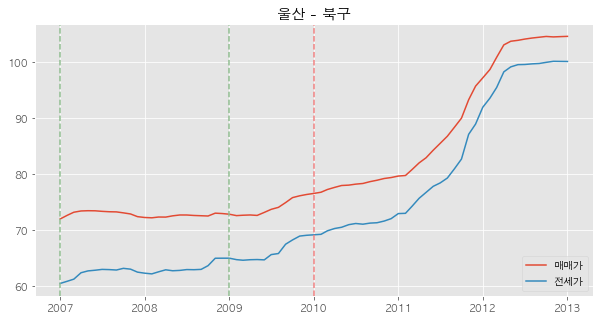

In [56]:
# 
si = '울산'
gu = '북구'
index_date = datetime(2010, 1, 1)

prev_date = index_date - relativedelta(months=12)
prev_date2 = index_date - relativedelta(months=36)
graph_start = index_date - relativedelta(years=3)
graph_end = index_date + relativedelta(years=3)

plt.figure(figsize=(10, 5))
plt.title(si + ' - ' + gu)
plt.plot(price_index[si][gu][graph_start:graph_end], label='매매가')
plt.plot(jeonse_index[si][gu][graph_start:graph_end], label='전세가')
plt.axvline(x=index_date, color='lightcoral', linestyle='--')
plt.axvline(x=prev_date, color='darkseagreen', linestyle='--')
plt.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
plt.legend()
plt.show()

In [57]:
# 수요 전략에 따라 선택된 모든 지역 그래프로 확인. 즉, demand 함수의 결과에서 선택된 지역명을 이용
for name in demand_ex.index:
    print(name)

('부산', '중구')
('부산', '서구')
('부산', '동구')
('부산', '부산진구')
('부산', '동래구')
('부산', '북구')
('부산', '해운대구')
('부산', '연제구')
('부산', '수영구')
('부산', '기장군')
('광주', '동구')
('광주', '남구')
('대전', '동구')
('대전', '중구')
('대전', '서구')
('대전', '유성구')
('대전', '대덕구')
('울산', '중구')
('울산', '남구')
('울산', '북구')
('울산', '울주군')
('경기', '평택')
('강원', '춘천')
('충북', '청주')
('충북', '흥덕구')
('충북', '충주')
('충남', '아산')
('충남', '논산')
('충남', '계룡')
('전북', '익산')
('전남', '순천')
('전남', '광양')
('전남', '여수')
('경북', '경산')
('경남', '진해구')
('경남', '양산')
('경남', '거제')
('경남', '김해')


In [58]:
index_date = datetime(2010, 1, 1)

time_range = 12
prev_date = index_date - relativedelta(months=time_range)
prev_date2 = index_date - relativedelta(months=time_range * 3)
graph_start = index_date - relativedelta(months=time_range * 3)
graph_end = index_date + relativedelta(months=time_range * 3)

num_row = int((len(demand_ex.index) - 1) / 2) + 1

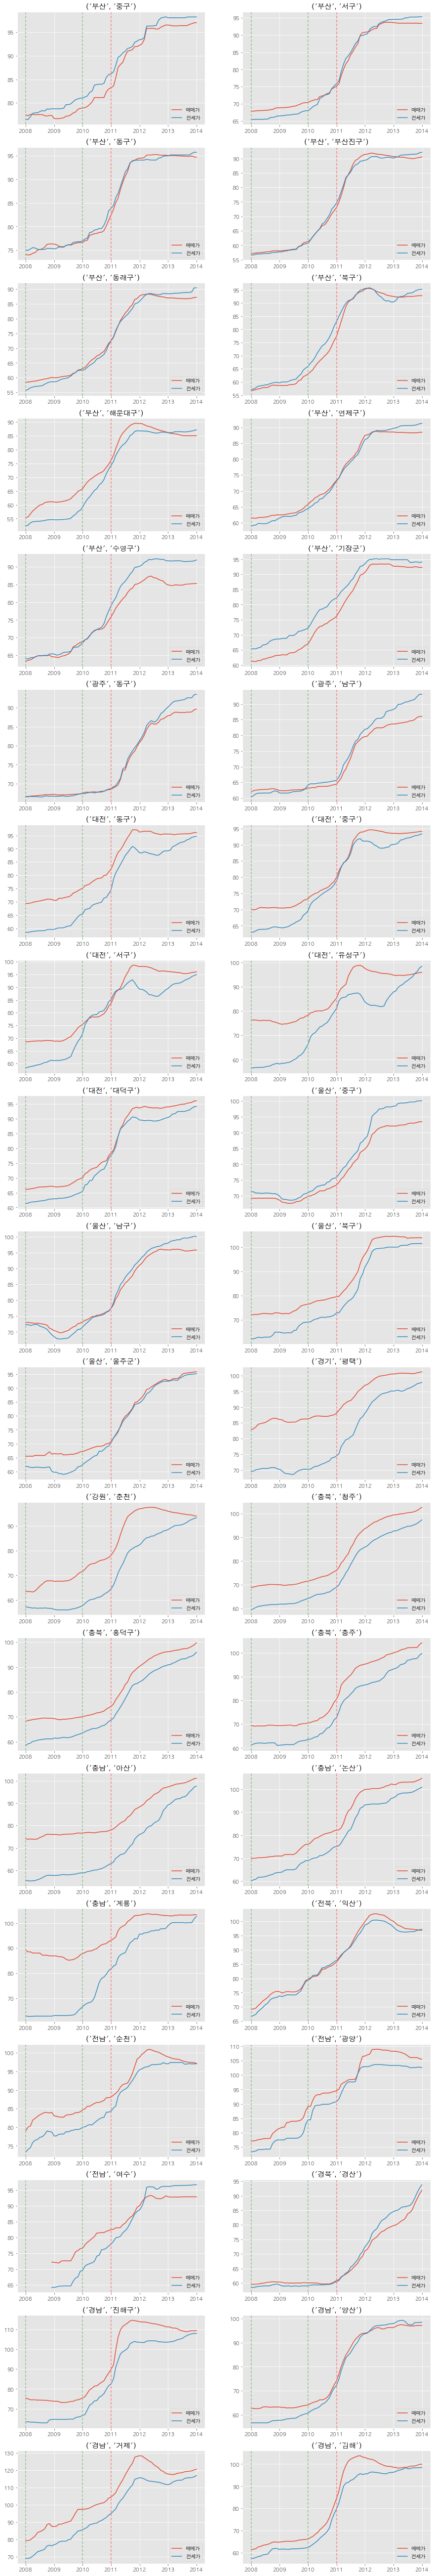

In [59]:
plt.figure(figsize=(15, num_row * 5))
for i, spot in enumerate(demand_ex.index):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    si = spot[0]
    gu = spot[1]
    plt.plot(price_index[si][gu][graph_start:graph_end], label='매매가')
    plt.plot(jeonse_index[si][gu][graph_start:graph_end], label='전세가')
    plt.axvline(x=index_date, color='lightcoral', linestyle='--')
    plt.axvline(x=prev_date, color='darkseagreen', linestyle='--')
    plt.axvline(x=prev_date2, color='darkseagreen', linestyle='--')
    plt.legend(loc='lower right') # ?????

plt.show()

datetime.datetime(2013, 1, 1, 0, 0)